<a href="https://colab.research.google.com/github/rpasquini/herramientas-econometricas/blob/main/Soluciones_a_la_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Soluciones Guía de Ejercicios Práctica




In [3]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 972kB 11.5MB/s 
     |████████████████████████████████| 6.5MB 50.2MB/s 
     |████████████████████████████████| 14.8MB 43.4MB/s 


# Cargando los datos de departamentos
Los datos a analizar son los datos de anuncios de alquiler para el período mayo-2019 mayo2020. Provienen de [Properati data](https://www.properati.com.ar/data/)

In [5]:
data=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/deptos_amba_0519_0520.zip?raw=true")

# Descripción de los datos que utilizará en el trabajo



*price*: alquiler mensual en pesos. \
*balcon*: True si tiene anuncio menciona que el departamento tiene balcón. \
*terraza*:	True si tiene anuncio menciona que el departamento tiene terraza. \
*amenities*: True si tiene anuncio menciona que el departamento tiene amenities (SUM, pileta, parrilla). \
*distanciaCBD*: Distancia al Obelisco en metros. \
*adjustedprice*: Alquier mensual a valores de Mayo 2019 (ajustado por inflación) \
*postcovid*: Dummy igual a 1 si el dato es posterior a 15 de Marzo 2020 \
*l2*: Variable categórica de macro regiones, incluye: 'Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste', 'Buenos Aires Interior'


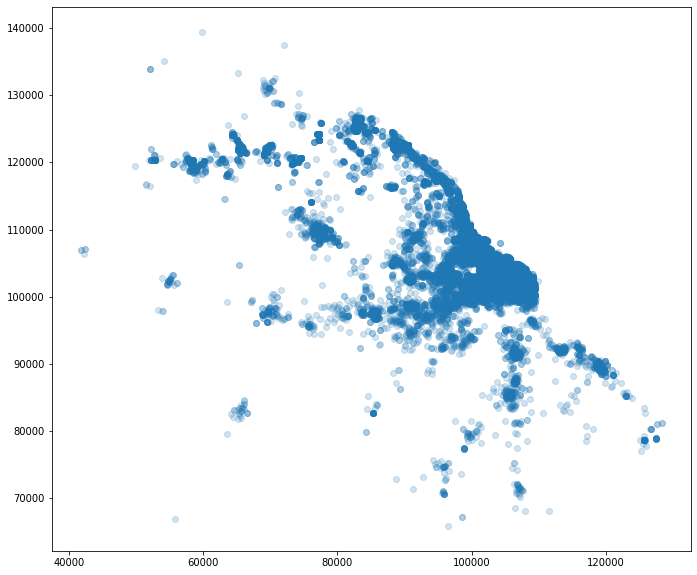

In [6]:

# Podemos ver que los datos se corresponden con el AMBA
data.plot(alpha=0.2, figsize=(20, 10))

In [8]:
data.columns

Index(['Unnamed_ 0', 'type', 'type_i18n', 'country', 'id', 'start_date',
       'end_date', 'created_on', 'place', 'developmen', 'operation',
       'operation_', 'type.1', 'type_i18n.', 'rooms', 'bedrooms', 'bathrooms',
       'surface_to', 'surface_co', 'price', 'currency', 'price_peri', 'title',
       'descriptio', 'lat', 'lon', 'l1', 'l2', 'l3', 'l4', 'l5', 'l6',
       'balcon', 'terraza', 'amenities', 'patio', 'distanciaC', 'adjustedpr',
       'postcovid', 'geometry'],
      dtype='object')

# Pregunta 1
Vamos a indagar una de las proposiciones de la teoría de la aglomeración, en este caso que la cercanía al centro de negocios del aglomerado estará relacionado al precio del alquiler.  Propondremos un modelo econométrico.  

Estime el siguiente modelo de regresión simple: 

$$price=\beta_0+\beta_1 distanciaCBD_i+\epsilon_i$$

\
1. ¿Qué valor obtuvo para los coeficientes $\beta_0$ y $\beta_1$? ¿Qué significan estos valores? Interprete.


In [12]:
import statsmodels.api as sm
def regress(lista, data):
  """ 
  Funcion que realiza la regresion OLS
  La primera variable de la lista es la dependiente, el resto son las explicativas
  data es la base de datos
  """
  datos=data[lista]
  # el metodo dropna() me permite eliminar las filas que tienen algun valor missing
  datos=datos.dropna()
  Y=datos[lista[0]]
  X=datos[lista[1:]]
  X=sm.add_constant(X)
  modelo=sm.OLS(Y,X)
  resultados=modelo.fit()
  print(resultados.summary())
  return resultados

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
resultados=regress(['price', 'distanciaC'], data=data)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     352.2
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           5.36e-78
Time:                        22:27:25   Log-Likelihood:            -2.5820e+05
No. Observations:               23135   AIC:                         5.164e+05
Df Residuals:                   23133   BIC:                         5.164e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.595e+04    160.807    161.348      0.0

$\beta_0$ es la constante que representa un valor de base para los alquileres ($ 25.950). Es una proyeccion porque el valor exacto se corresponde con una distancia de 0 al obelisco.  \\

$\beta_1$ es el efecto de estar a distancia del centro, el cual impacta negativamente en el valor del alquiler en 17 centavos por metro o 173 pesos por kilómetro. 


# Pregunta 2
¿Qué dicen los tests estadísticos de los coeficientes individuales de $\beta_0$ y $\beta_1$? ¿Cómo se interpreta la significancia estadística en este caso?



Los tests estadísticos para los coeficientesde βo y  β1 arrojan ambos un Pvalor cercano a 0 (0.000). Por lo tanto, la probabilidad de  los valores encontrados es casi nula cuando se asume que los valores poblacionales son 0.  Por lo tanto rechazamos la hipotesis nula. Concluimos que ambos efectos son significativos en términos estadísticos.

# Pregunta 3

¿Qué opina sobre la magnitud del coeficiente estimado para el efecto de la distancia, es económicamente importante?


Esta pregunta puede no tener una respuesta única. 

Una forma de verlo es que el coeficiente estimado para el efecto de la distancia no es economicamente importante, ya que cada kilómetro de distancia del centro en promedio representaría $ 173, y esto parece insignificante ante un alquiler mediano de $19000.

Una cuenta más acorde a los datos es considerar que el desvio estandar de la distancia es 12 kilometros. Con lo cual una desviacion promedio de distancia representa un efecto de $2076. Eso equivale a un 12% de un desvio estandar del valor del alquiler, lo cual es una magnitud baja pero no insignificante.



In [17]:
(12*173)/17141

0.12111312058806371

In [15]:
data.distanciaC.describe()

count    23135.000000
mean     12482.748480
std      12085.787125
min         36.308455
25%       3707.954303
50%       7839.973435
75%      17268.609815
max      65739.264105
Name: distanciaC, dtype: float64

In [14]:
data.price.describe()

count     23135.000000
mean      23777.665485
std       17141.968480
min        6200.000000
25%       14000.000000
50%       19000.000000
75%       27000.000000
max      195000.000000
Name: price, dtype: float64

# Pregunta 4


En base a los resultados de su estimación, realice una predicción del valor de alquiler de un departamento ubicado a 1km, a 5km y a 10km del Obelisco 



In [ ]:
resultados.params['const']+resultados.params['distanciaC']*1000

25772.12803627377

In [ ]:
resultados.params['const']+resultados.params['distanciaC']*5000

25077.35968719401

In [ ]:
resultados.params['const']+resultados.params['distanciaC']*10000

24208.899250844308

# Pregunta 5 

Compute y analice gráficamente los residuos estimados para el modelo que ajustó en el
punto anterior. Luego responda, explicando sus resultados:
a. ¿Aparentan los errores del modelo seguir una distribución normal?
b. ¿Tiene alguna implicancia el diagnostico de los errores en la interpretacion del modelo? ¿En qué parte?


In [23]:
residuos=resultados.resid

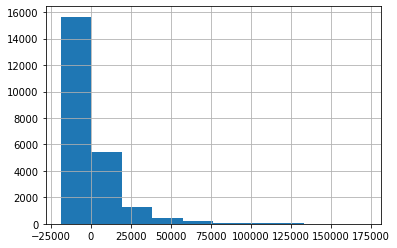

In [24]:
residuos.hist()

Los errores NO aparentan seguir una distribución normal.
El diagnóstico de los residuos tiene implicancias en la interpretación del modelo. Si los errores siguen una distribución normal, estos tienden a corregirse conforme se aumente el tamaño de la muestra. Si el tamaño de la muestra de la que disponemos es suficientemente grande, nos sería indiferente que los errores siguieran una distribución normal. 


# Pregunta 6

¿Puede proponer alguna transformación al modelo que mejore el cumplimiento del supuesto de normalidad de los errores? Reestime el modelo.


In [26]:
import numpy as np
data['logprice']=np.log(data['price'])

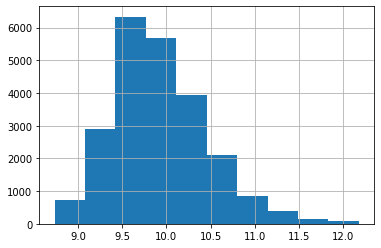

In [27]:
data['logprice'].hist()

In [28]:
resultados=regress(['logprice', 'distanciaC'], data=data)

                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     520.2
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          7.07e-114
Time:                        22:30:40   Log-Likelihood:                -17683.
No. Observations:               23135   AIC:                         3.537e+04
Df Residuals:                   23133   BIC:                         3.539e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9977      0.005   2035.402      0.0

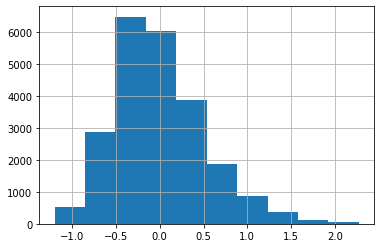

In [35]:
data['residuos2']=resultados.resid
data['residuos2'].hist()

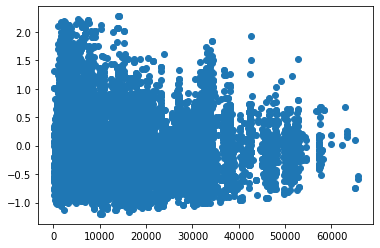

In [36]:
import matplotlib.pyplot as plt
plt.scatter(data.distanciaC,data.residuos2)

Por medio de la transformación logarítmica mejoramos el cumplimiento de normalidad de los errores. Reestimado el modelo, obtenemos nuevos valores para β1, el cual aqui se expresa de forma porcentual (0.064), es decir un 6.4 porciento negativo. Se observa también que el valor de R2 mejora levemente de 0.015 anteriormente a 0.022. Es decir mejoró levemente la explicación del valor del alquiler como resultado del factor distancia del centro (la explicación de la variabilidad mejoró levemente, aunque sigue siendo muy baja). Es decir, el modelo solo explica la variabilidad del valor de los alquileres en un 2.2 porciento.

# Pregunta 7


La variable 'l2' en la base de datos presenta información sobre macro areas de pertenencia de las observaciones, separando en los siguientes grupos:

'Capital Federal', 'Bs.As. G.B.A. Zona Norte',
       'Bs.As. G.B.A. Zona Sur', 'Bs.As. G.B.A. Zona Oeste',
       'Buenos Aires Interior'

Expanda el modelo de regresión con la incorporación de esta información (manteniendo la variable distancia):

Interprete los resultados de las nuevas variables incorporadas.

In [37]:
import pandas as pd

In [38]:
dummiesmacrozona=pd.get_dummies(data.l2, prefix='dum')
dummiesmacrozona

,dum_Bs.As. G.B.A. Zona Norte,dum_Bs.As. G.B.A. Zona Oeste,dum_Bs.As. G.B.A. Zona Sur,dum_Buenos Aires Interior,dum_Capital Federal
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
23130,0,0,0,0,1
23131,0,0,0,0,1
23132,0,0,0,0,1
23133,0,0,0,0,1


In [39]:
data=pd.concat([data, dummiesmacrozona],axis=1)

In [42]:
regress(['price', 'dum_Buenos Aires Interior','dum_Bs.As. G.B.A. Zona Norte','dum_Bs.As. G.B.A. Zona Oeste','dum_Bs.As. G.B.A. Zona Sur','distanciaC'], data=data)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     285.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          2.37e-297
Time:                        22:36:12   Log-Likelihood:            -2.5768e+05
No. Observations:               23135   AIC:                         5.154e+05
Df Residuals:                   23129   BIC:                         5.154e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

El valor "base" de los alquileres es de  26790 pesos. 

Si se tiene en cuenta el efecto de la distancia, el valor de los alquileres para la zona norte del Gran Buenos Aires es superior en 5.309 pesos respecto del valor de los alquileres de los departamentos ubicados en Capital Federal (ya que es la variable dummy que hemos dejado fuera del modelo y por lo tanto nuestra constante y valor de referencia). Sin embargo, no tiene sentido hacer una comparacion con la capital ya que estas areas por definicion estan mas alejadas. Las comparaciones que tienen más sentido son entre las areas que están a una misma distancia de capital.

# Pregunta 8
¿Cómo se ve afectada la variable distanciaCBD? ¿Cómo explica el resultado?


Al incorporar las dummy de macrozonas al modelo, el coeficiente distancia al CBD se modifica de - 0.1737 a -0.2727. Es razonable que el efecto se modifique ya que las dummies que se agregaron están muy relacionadas con la distancia. 

# Pregunta 9

Plantee un modelo que le permita identificar la diferencia de valor que existe entre 'Bs. As GBA Zona Sur' y 'Bs. As GBA Zona Norte' teniendo en cuenta una misma distancia a la capital federal.


In [43]:
Datanortesur = data[["price","distanciaC","dum_Bs.As. G.B.A. Zona Norte","dum_Bs.As. G.B.A. Zona Sur"]]


In [44]:
Datanortesur = Datanortesur.loc[(Datanortesur["dum_Bs.As. G.B.A. Zona Norte"] == 1) | (Datanortesur["dum_Bs.As. G.B.A. Zona Sur"]==1)] 


In [45]:
regress(['price', 'distanciaC', 'dum_Bs.As. G.B.A. Zona Norte'], data=Datanortesur)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     323.0
Date:                Wed, 25 Nov 2020   Prob (F-statistic):          1.26e-134
Time:                        22:41:26   Log-Likelihood:                -72909.
No. Observations:                6664   AIC:                         1.458e+05
Df Residuals:                    6661   BIC:                         1.458e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Interpretamos los resultados dela siguiente manera: La constante del modelo representa el valor del alquiler de un departamento en la zona Sur del GBA (por haber excluido esa variable de la regresión). Ese valor es 18.300 pesos. Tenemos que el efecto de alejarse del centro CBD es de 22,24 centavos por cada metro, o bien 224 pesos cada 1.000 metros. Asimismo, tenemos que el valor del alquiler de un departamento en la zona Norete de GBA es de 12.350 pesos adicionales al valor base (en este caso, el valor de zona Sur de GBA de 18.300 pesos). Por lo tanto, el valor del alquiler de un departamento en zona Norte sería 30.650 pesos (18.300 + 12.350). Ahora bien: si suponemos una distancia del centro CBD de 10.000 metros, de acuerdo al "efecto distancia" de -0.224, esto supondría que habría que restarle 2.240 pesos a los valores de los alquileres en cada zona analizada. Consecuentemente, el valor del alquiler para un departamento en zona Norte GBA sería de 28.410 pesos (18.300+12.350-2.240), mientras quepara zona sur, el valor sería de 16.060 pesos (18.300-2.240). Ambos coeficientes son estadísticamente significativos.

# Pregunta 10
La base de datos presenta información sobre la presencia de amenities en el edificio del  departamento en cuestión.
Tienen incidencia en el precio? De cuanto es la incidencia? Analice.




In [53]:
# arreglando problema con la variable amenities que no la tomaba como float
data.amenities=data.amenities.astype(float)

In [54]:
regress(['price', 'distanciaC', 'amenities'], data=data)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1014.
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:46:02   Log-Likelihood:            -2.5740e+05
No. Observations:               23135   AIC:                         5.148e+05
Df Residuals:                   23132   BIC:                         5.148e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.385e+04    163.715    145.668      0.0

El modelo arroja un valor base de alquiler de 23.850 pesos. El efecto de contar con amenities, le suma al alquiler 9789 pesos. Este efecto es muy significativo económicamente, ya que representa un 41 por ciento adicional respecto del alquiler de los departamentos sin amenities. Asimismo, el coeficiente de amenities es estadísticamente significativo, pues el pvalor es muy bajo (0.000). Finalmente, el modelo indica que el hecho de contar con amenities explica solo un 8 por ciento de la variabilidad del precio del alquiler.

# Pregunta 11

La base de datos también presenta información de la presencia de balcón y de terraza en el departamento. Incorpore ambas variables al modelo con el que viene trabajando desde el punto anterior.En qué magnitud aumentarán el valor de un alquiler por la presencia de balcón y de terraza respectivamente? Son estos efectos significativos? \




In [56]:
data.terraza=data.terraza.astype(float)
data.balcon=data.balcon.astype(float)

regress(['price', 'distanciaC', 'amenities','terraza','balcon'], data=data)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     629.5
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:48:40   Log-Likelihood:            -2.5718e+05
No. Observations:               23135   AIC:                         5.144e+05
Df Residuals:                   23130   BIC:                         5.144e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.192e+04    202.509    108.252      0.0

# Pregunta 12

Ante la incorporación de variables propuesta en el punto anterior: ¿Cambió el diagnóstico de la presencia de amenidades en el edificio? ¿Cómo lo explica?



El efecto en el valor del alquiler por contar con amenidades en el edificio se modificó levemente ( de 9700 a 8400). La razon por la que se modifica el coeficiente es porque hay una correlacion entre los departamentos con amenidades y los que tienen balcon. 

# Pregunta 13 ¿Cambió el covid la contribución al alquiler de un balcón, una terraza o la presencia de amenities en el edificio?

Usted cuenta con dos variables que posibilitan hacer este análisis. Por un lado, la variable 'postcovid' identifica con un 1 si las observaciones pertenecen al período posterior al COVD (15 de marzo en adelante).

Le propongo que reestime el modelo anterior, usando dos muestras de datos por separado. Los datos precovid y post covid. 

Reestime en cada muestra el modelo econométrico con el que viene trabajando hasta la pregunta 12.

Para evitar problemas de inflación en sus resultados, utilice en vez de 'price', la variable "adjustedprice"



In [61]:
data_postcovid=data.loc[(data.postcovid==1)]
data_precovid = data.loc[(data.postcovid==0)]


regress(['adjustedpr', 'distanciaC', 'amenities','terraza','balcon'], data=data_precovid)


                            OLS Regression Results                            
Dep. Variable:             adjustedpr   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     599.9
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:55:07   Log-Likelihood:            -2.3168e+05
No. Observations:               21263   AIC:                         4.634e+05
Df Residuals:                   21258   BIC:                         4.634e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.855e+04    169.163    109.685      0.0

In [62]:
regress(['adjustedpr', 'distanciaC', 'amenities','terraza','balcon'], data=data_postcovid)

                            OLS Regression Results                            
Dep. Variable:             adjustedpr   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     61.19
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           1.24e-48
Time:                        22:55:18   Log-Likelihood:                -20902.
No. Observations:                1872   AIC:                         4.181e+04
Df Residuals:                    1867   BIC:                         4.184e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.222e+04    762.543     29.144      0.0

Conclusión al comparar los dos modelos: 
Comparando los dos modelos precovid y postcovid, observamos que la incidencia de tener amenities aumentó a partir de la irrupción del covid. Esta pasó de 6893 a 9998. 

Los coeficientes de  balcon y  terraza cayeron, pero puede verse que las magnitudes de las caidas podrian deberse al error de medicion que sugieren los errores estandares. En el caso de las amenidades esta mas claro que la magnitud del aumento es significativa.

Notemos que los errores estandares aumentan en el segundo modelo, y esto se debe a la menor cantidad de observaciones.